<a href="https://colab.research.google.com/github/param1707/-Optimizing-a-neural-network-filter-bank-for-musical-instrument-classification-/blob/main/Basic_Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Basic Audio Processing Colab Notebook

In [165]:
import numpy as np
from IPython.display import Audio

from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal as signal
import librosa                    
import librosa.display
from os import path
from pydub import AudioSegment
#from freqz import freqz
import scipy.signal as sp
 
#import simpleaudio as sa
##import sounddevice as sd
#import soundfile as sf
#from playsound import playsound
#import winsound

In [ ]:
!apt install freqz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package freqz


## **Load wav file from github**

In [ ]:
!wget https://raw.githubusercontent.com/param1707/-Optimizing-a-neural-network-filter-bank-for-musical-instrument-classification-/main/LRMonoPhase4.mp3
print("LRMonoPhase4.mp3 loaded")

#Audio('LRMonoPhase4.mp3')
src = "LRMonoPhase4.mp3"
dst = "LRMonoPhase4.wav"

# convert mp3 to wav for read operation                                                       
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

#samplerate,data = wavfile.read('LRMonoPhase4.mp3')
samplerate,data = wavfile.read(dst)
print('sampling rate =',samplerate,'Hertz')
print('data =',data)


time = np.arange(0,len(data))/samplerate
print('time =',time)

# numpy 2D audio data in integer
audiodata = np.array(data,dtype=np.int16)

# numpy 2D audio data in float
audiodata_float = np.array(data,dtype=np.float16)

# numpy 1d audio data for spectrogram representation
specdata = audiodata.flatten()

# numpy 1d audio data for melspectrogram representation
melspecdata = audiodata_float.flatten()

#print(melspecdata)



--2020-10-24 09:59:45--  https://raw.githubusercontent.com/param1707/-Optimizing-a-neural-network-filter-bank-for-musical-instrument-classification-/main/LRMonoPhase4.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 931630 (910K) [audio/mpeg]
Saving to: ‘LRMonoPhase4.mp3.19’

LRMonoPhase4.mp3.19 100%[===================>] 909.79K  --.-KB/s    in 0.08s   

2020-10-24 09:59:45 (10.9 MB/s) - ‘LRMonoPhase4.mp3.19’ saved [931630/931630]

LRMonoPhase4.mp3 loaded
sampling rate = 44100 Hertz
data = [[-1  0]
 [ 0  0]
 [ 1 -1]
 ...
 [ 3 -1]
 [ 1 -3]
 [ 9 -7]]
time = [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.87615873e+01
 3.87616100e+01 3.87616327e+01]


# **Plotting of audio waveform**

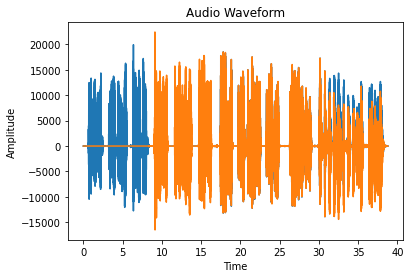

In [ ]:
plt.figure(1)

plt.plot(time,audiodata)
plt.title('Audio Waveform');
plt.xlabel('Time'); plt.ylabel('Amplitude');
plt.show()


# **Spectrogram of an audio file**

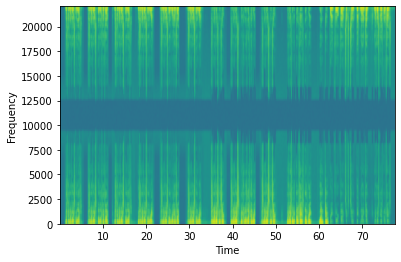

In [ ]:
plt.figure(2)
powerSpectrum, freqenciesFound, Time, imageAxis = plt.specgram(specdata, Fs=samplerate)
#plt.plot(Time,freqenciesFound)
#plt.title('Audio Waveform');
plt.xlabel('Time'); plt.ylabel('Frequency');
plt.show()

# **Mel Spectrogram of an audio file**

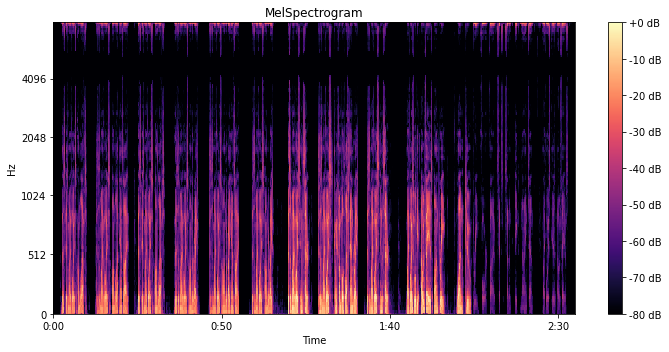

In [ ]:
melSpec = librosa.feature.melspectrogram(y=melspecdata, sr=samplerate, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)

plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

# **Duration of the audio file in seconds**

In [ ]:
total_time = len(data)/samplerate
print('Total Time = ',total_time,'seconds' )

Total Time =  38.761655328798184 seconds


# **Playback Audio file**

In [ ]:
 
 
Audio(dst)

# **Low pass filter designing with 2000 Hz cutoff freq and 60dB attenuation in stop band**

In [ ]:
fs = 44100         # Sample rate, Hz
cutoff = 2000.0    # Desired cutoff frequency, Hz
trans_width = 50  # Width of transition from pass band to stop band, Hz
numtaps = 500      # Size or length of filter.
A = [1.0, 0.0]
W = [1, 1000]
hmin = sp.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs],A, Hz=fs,weight=W)



# **Filter impulse response**

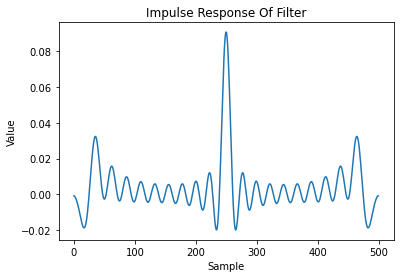

In [ ]:
plt.figure(3)
plt.plot(hmin)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Impulse Response Of Filter');
plt.show()

# **Function for plotting filter Magnitude Response**

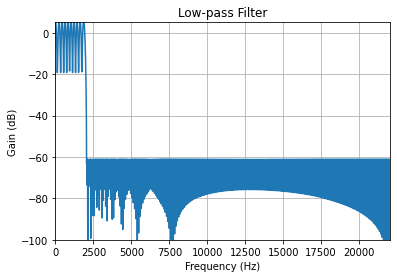

In [ ]:

def plot_magnitude_response(fs, w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-100, 5)
    ax.set_xlim(0, 0.5*fs)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

w, h = sp.freqz(hmin,[1],worN=2000)
plot_magnitude_response(fs, w, h, "Low-pass Filter")


# **Function for plotting filter phase Response**

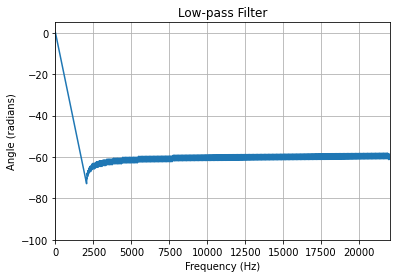

In [147]:
def plot_phase_response(fs, w, h, title):
    "Utility function to plot response functions"
    angles = np.unwrap(np.angle(h))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi,angles)
    ax.set_ylim(-100, 5)
    ax.set_xlim(0, 0.5*fs)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Angle (radians)')
    ax.set_title(title)

w, h = sp.freqz(hmin,[1],worN=2000)
plot_phase_response(fs, w, h, "Low-pass Filter")

# **Filtering Of audio data**

In [175]:
y1 = sp.lfilter(hmin, 1,specdata )
print(y1)
B = np.reshape(y1, (-1, 2))
print(B)
samplerate = 44100
#wavfile.write('filterAudio.wav',samplerate,B)
librosa.output.write_wav('filterAudio.wav', B, samplerate)
Audio('filterAudio.wav')

[0.00081826 0.0009781  0.00151913 ... 0.50525677 0.56696596 0.62898703]
[[0.00081826 0.0009781 ]
 [0.00151913 0.0022155 ]
 [0.00225944 0.00395341]
 ...
 [0.32178529 0.37523299]
 [0.44678331 0.50525677]
 [0.56696596 0.62898703]]
